# Tasks
Data Processing (70%)
Using standard python (No pandas / seaborn) with default libraries (os, sys, time, json, csv,
...) you have been given the following tasks:
1. Read in the provided ACW Data using the CSV library.
2. As a CSV file is an entirely flat file structure, we need to convert our data back into its
rich structure. Convert all flat structures into nested structures. These are notably:
a. Vehicle - consists of make, model, year, and type
b. Credit Card - consists of start date, end date, number, security code, and
IBAN.
c. Address - consists of the main address, city, and postcode.
For this task, it may be worthwhile inspecting the CSV headers to see which data
columns may correspond to these above.
Note: Ensure that the values read in are appropriately cast to their respective types.
3. The client informs you that they have had difficulty with errors in the dependants
column. Some entries are empty (i.e. “ “ or “”), which may hinder your conversion
from Task 2. These should be changed into something meaningful when
encountered.
Print a list where all such error corrections take place.
E.g. Problematic rows for dependants: [16, 58, 80, 98]
4. Write all records to a processed.json file in the JSON data format shown in the
appendix to this document. This should be a list of dictionaries, where each index of
the list is a dictionary representing a singular person.
5. You should create two additional file outputs, retired.json and employed.json,
these should contain all retired customers (as indicated by the retired field in the
CSV), and all employed customers respectively (as indicated by the employer field in
the CSV) and be in the JSON data format.
6. The client states that there may be some issues with credit card entries. Any
customers that have more than 10 years between their start and end date need
writing to a separate file, called remove_ccard.json, in the JSON data format. The
client will manually deal with these later based on your output. They request that you
write a function to help perform this, which accepts a single row from the CSV data,
and outputs whether the row should be flagged. This can then be used when
determining whether to write the current person to the remove_ccard file. Note the
dates are shown in the format used on credit cards which is “MM/YY”.
7. You have been tasked with calculating some additional metrics which will be used for
ranking customers. You should create a new data attribute for our customers called
“Salary-Commute”. Reading in from processed.json:
a. Add, and calculate appropriately, this new attribute. It should represent the
Salary that a customer earns, per Km of their commute.
i. Note: If a person travels 1 or fewer commute Km, then their salary-
commute would be just their salary.
b. Sort these records by that new metric, in ascending order.
c. Store the output file out as a JSON format, for a commute.json file.

# Task 1
## I am Importing the CSV Library and json library for further tasks
I just brought in the "csv" library to handle my file. Next up, I’ll use "csv.reader" to dig into the data. I am using it as the tool that will break down my "csv_file" saved in csv_reader variable, so that i can start working on it.

##NOTE: 
I will be using these lines throughout my assessment to reopen my file in every cell because the code automatically closes the file once the block ends

In [2]:
""" I used the file format manager to open my "relative" file, this also automatically 
closes my file whenever my code block finishes executing
I then created a variable to save the csv.method in it while it takes my file as a parameter
"""

import csv  # Importing the csv module to work with CSV files
import json 


with open ("acw_user_data.csv") as csv_file:
    csv_reader = csv.reader(csv_file)        


# Task 2
### a. I am going to print out the header (first row) in my file to inspect what i am working with

I could also use the python built-in "next" method to print my columns. But In order to stay in the scope of study taught in class, i am going to use the "enumerate" method. 

### b. Then proceeding to group/ cast them into respective categories
#### I grouped my data into 4 nested dictionaries.
    i. Nested_Dictionary 1 is Person with the following keys :Last name, first name, sex, marital, age, dependants, retired, pension, salary, employer
    ii. Nested_Dictionary 2 is Vehicle with the following keys : make, model, year, type, commute
    iii. Nested_Dictionary 3 is Credit card with the following keys : start date, expiry date, number, cvv, bank
    iv. Nested_Dictionary 4 is Address with the following keys : street, city, posctcode

## NOTE : I am also going to put my dictionary in a function in this task so i can easily use in further tasks without having to re-write my dictionary again and again

In [3]:


nested_structure = []  # Here I created an empty list to store all the nested dictionaries

with open("acw_user_data.csv") as csv_file:  # Opening the CSV file using the 'with' statement to ensure proper resource management
    csv_reader = csv.reader(csv_file)  # Reading the CSV file using the csv.reader method
    for rows, columns in enumerate(csv_reader):  # This for loop helps me iterate through the rows of the CSV file
        if rows == 0:  # The first row contains the headers (column names)
            header = columns  # Assigning the first row to the 'header' variable
            print(header)  # Printing the headers to know what I am working with
            continue  # This helps me skip the first row and move on to the next iteration

        """
        I am going to use dictionary comprehension here to nest my dictionaries together, 
        by combining the header (list of column names from the CSV file) with columns 
        (list of values from the current row being processed). This structure makes the 
        data easier for me to process programmatically. Instead of dealing with flat lists 
        or unstructured rows, it creates a hierarchy, allowing for more organized access 
        to the information of related data. My nested_dictionary would be in pairs (keys 
        and values), e.g., "last name": data["Last Name"], "model": data["Vehicle Model"], and so on.
        And i put my dictionary in a function for reusability in further tasks
        """

        def create_entry(header, columns):     #Here is the fuction for my dictionary accepting 2 parameters
            data = {key: value for key, value in zip(header, columns)}  # Pair header with values
            all_entry = {  # Organize data into a structured dictionary
                "last name": data["Last Name"],
                "first name": data["First Name"],
                "sex": data["Sex"],
                "marital": data["Marital Status"],
                "age": data["Age (Years)"],
                "dependants": data["Dependants"],
                "retired": data["Retired"],
                "pension": data["Yearly Pension (Dollar)"],
                "salary": data["Yearly Salary (Dollar)"],
                "employer": data["Employer Company"],
                "Vehicle": {
                    "make": data["Vehicle Make"],
                    "model": data["Vehicle Model"],
                    "year": data["Vehicle Year"],
                    "type": data["Vehicle Type"]
                },
                "Credit Card": {
                    "start date": data["Credit Card Start Date"],
                    "expiry date": data["Credit Card Expiry Date"],
                    "number": data["Credit Card Number"],
                    "cvv": data["Credit Card CVV"],
                    "bank": data["Bank IBAN"]
                },
                "Address": {
                    "street": data["Address Street"],
                    "city": data["Address City"],
                    "postcode": data["Address Postcode"]
                },
                "commute": {
                    "commute_distance_to_work": data["Distance Commuted to Work (Km)"]
                }
            }
            return all_entry

        # Create an entry for the current row and append it to the nested structure
        all_entry = create_entry(header, columns)
        nested_structure.append(all_entry)  # Appending the 'all_entry' dictionary to the 'nested_structure' list

print(nested_structure)  # Printing the final nested structure after processing all rows

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (Km)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (Dollar)', 'Retired', 'Yearly Salary (Dollar)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']
[{'last name': 'Wilson', 'first name': 'Kieran', 'sex': 'Male', 'marital': 'married or civil partner', 'age': '89', 'dependants': '3', 'retired': 'TRUE', 'pension': '7257', 'salary': '72838', 'employer': 'N/A', 'Vehicle': {'make': 'Hyundai', 'model': 'Bonneville', 'year': '2009', 'type': 'Pickup'}, 'Credit Card': {'start date': 'Aug-18', 'expiry date': 'Nov-27', 'number': '6.76374E+11', 'cvv': '875', 'bank': 'GB62PQKB71416034141571'}, 'Address': {'street': '70 Lydia isle', 'city': 'Lake Conor', 'postcode': 'S71 7XZ'}, 'commute': {'commute_distance_to_work': '0'}}, {'l

## Task 3

After printing out the header(the first row), which was done in task 2a. The "Dependants" column is at the 10th index (counting from 0).
Now i am going to write code to print the rows where such problematic column occur

After familiairzing myself with the data, i used +1 in my code to print out the particular row where there were empty values for "Dependants" column. So it tallies exactly with empty rows in the raw file.

In [4]:
                                         
empty_dependants = []                                    # I created an empty list to track rows with missing Dependants

with open("acw_user_data.csv") as csv_file:             
    csv_reader = csv.reader(csv_file)                   
    for rows, columns in enumerate(csv_reader):          
        if rows == 0:
            dependants_idx = 10                                  # Dependants is the 11th column (index 10)
            continue                                             # Skipping the header row

        # Check if the Dependants value in this row is empty or whitespace
        if columns[dependants_idx].strip() == "":             # I am Checking the actual data at the Dependants index and using strip method to get rid of whitespace
            empty_dependants.append(rows +1)                   # Record the row index (1-based, including header)

print("Problematic rows for dependants:(1 based, including header):", empty_dependants)
   


Problematic rows for dependants:(1 based, including header): [23, 111, 181, 207, 272, 274, 276, 360, 462, 470, 581, 638, 681, 727, 824, 867, 919, 933, 985]



# Task 4

I am going to write all the records to a json file, this would be a list of dictionaries where each index would represent a single person and then saved it as processed.json



In [9]:


json_data = []  # I created an Empty list to store all processed entries for JSON output

with open("acw_user_data.csv") as csv_file:  # Open CSV file in read mode, it is usually in default mode, so i did not explicitly write it out
    csv_reader = csv.reader(csv_file)  # Create CSV reader object
    for rows, columns in enumerate(csv_reader):  # Loop through each row
        if rows == 0:  # Check if it's the header row
            header = columns  # Store the header
            continue  # Skip to the next iteration

        # Use the function to create the entry
        entry = create_entry(header, columns)
        json_data.append(entry)  # Add the structured dictionary to the list

with open("processed.json", "w") as json_file:  # Open JSON file in write mode
    json.dump(json_data, json_file, indent = 4)  # Writing the list to the JSON file with indentation and make it readable just like the appendix on the canvas

print("Data has been written to processed.json")  # Confirmation message

Data has been written to processed.json


# Task 5
 I am creating 2 different files: retired.json and employed.json,
these would  contain all retired customers, and all employed customers respectively  and be in the JSON data format. I would also print the total numbers of person in each file by using the python len() method

NOTE : After familiazing myself with the data, i noticed the empty rows on the "Employer company" are filled with "N/A". So i am going to treat such rows as individuals who are not employed

In [54]:
# I am creating an empty list to store records of retired customers
retired_json = []  
# I did the same for employed too
employed_json = []  

# Opening my CSV file in read mode
with open("acw_user_data.csv") as csv_file:
    csv_reader = csv.reader(csv_file)  # I am creating a CSV reader object to parse my file, using a comma as the default delimiter
    for rows, columns in enumerate(csv_reader):  # Looping through each row in my CSV file, where 'rows' is the row number and 'columns' is the data in that row
        if rows == 0:  # Process header
            header = columns  # Store the header row
            continue  # I’m skipping the header row so I can move on to the actual data in the next iteration

        # Using my function to create a structured record for this row
        record = create_entry(header, columns)

        """ I’m using two separate if statements here because I want to check both conditions independently. 
        If I used an if-else statement, the program would skip the second condition once the first one is true, 
        but I need to check both to properly categorize retired and employed people.
        """
        
        if record["retired"] == "TRUE":  # I am checking if the person is retired based on the 'TRUE' boolean 
            retired_json.append(record)  # If retired, adding their record to my retired_json list
        if record["employer"] != "N/A":  # I am checking if the person is employed by seeing if "company" is NOT(!=) "N/A"
            employed_json.append(record)  # If employed, I am adding their record to my employed_json list



In [55]:
# Writing the retired customers to a JSON file
with open("retired.json", "w") as retired_file:  # Opening a new file called "retired.json" in write mode
    json.dump(retired_json, retired_file, indent = 4)  # Writing my retired_json list to the "retired.json" file with indentation for readability


In [56]:
# Writing the employed customers to a JSON file
with open("employed.json", "w") as employed_file:  # Opening a new file called "employed.json" in write mode
    json.dump(employed_json, employed_file, indent=4)  # I am writing my employed_json list to the "employed.json" file with indentation for readability

In [57]:
# I’m printing a message to confirm the retired customers were written and showing the total count
print(f"Retired customers have been written to retired.json. Total retired customers: {len(retired_json)}")
# Same for this too
print(f"Employed customers have been written to employed.json. Total employed customers: {len(employed_json)}")

Retired customers have been written to retired.json. Total retired customers: 246
Employed customers have been written to employed.json. Total employed customers: 754


# TASK 6 redifined with functions

After familiarizing myself with the data, i noticed some inconsistencies on the "Credit Card Start Date" column. For example; Row 2 is "Aug- 18", while row 3 is "08-Dec", which makes it difficult to work on the column. After clicking on rows with the latter format (08-Dec), such as row 3, 8, 10 and others. I found out that they all belonged to the same year ("2025"). Such as 08-Dec means Dec-2025, 10-Dec means Dec-2025. So i used this code to make such rows tally with the rest of the rows (manipulating the indexes to get desired resuklt)

 If the second part is "Dec", I am setting the month to "12" and year to "25" which means 2025
        elif credit_card_start[1] == "Dec":
            credit_card_start[0] = "12"
            credit_card_start[1] = "25"  # Replace "Dec" with "25"
#### NOTE : These lines of codes were extraxted from my complete code


This code processes a CSV file to flag credit cards older than 10 years. I define a month_map dictionary to convert month abbreviations (e.g., "Jan" to "01"). My flag_this_row function splits the credit card start and expiry dates, converts months to numbers using month_map (or hardcodes "Dec" as "12" and "Nov" as "11" with year "25"), and calculates the year difference. If the difference exceeds 10 years, I return True; otherwise, False. I handle invalid formats by printing errors and returning False. I then read the CSV file, skip the header, and for each row, create a data dictionary. If flag_this_row returns True, I print the row, build a record with user details (name, age, vehicle, etc.), and append it to remove_ccard. Finally, I write remove_ccard to "remove_ccardddddd.json" and print the total flagged cards.

In [58]:
#  creating a dictionary to map month abbreviations to their numerical values for date conversion
month_map = {
    "Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04",
    "May": "05", "Jun": "06", "Jul": "07", "Aug": "08",
    "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"
}

In [59]:


# I am defining a function to check if a credit card is older than 10 years
def flag_this_row(data):
    #  splitting the credit card start and expiry dates into parts (e.g., "Jan-20" becomes ["Jan", "20"])
    credit_card_start = data["Credit Card Start Date"].split("-")
    credit_card_end = data["Credit Card Expiry Date"].split("-")

    # checking if the start date has exactly two parts (month and year)
    if len(credit_card_start) == 2:
        # If the month is in my month_map,  then converting it to a number (e.g., "Jan" to "01")
        if credit_card_start[0] in month_map:
            credit_card_start[0] = month_map[credit_card_start[0]]
        # If the second part is "Dec", I’m setting the month to "12" and year to "25" which means 2025
        elif credit_card_start[1] == "Dec":
            credit_card_start[0] = "12"
            credit_card_start[1] = "25"  # Replace "Dec" with "25"
        # If the second part is "Nov", I’m setting the month to "11" and year to "25"
        elif credit_card_start[1] == "Nov":
            credit_card_start[0] = "11"
            credit_card_start[1] = "25"  # Replace "Nov" with "25"
        else:
            # If the format is invalid, I am printing an error and returning False
            print(f"Invalid format in credit_card_start: {data['Credit Card Start Date']}")
            return False

    # checking if the expiry date has exactly two parts (month and year)
    if len(credit_card_end) == 2:
        # If the month is in my month_map, converting it to a number
        if credit_card_end[0] in month_map:
            credit_card_end[0] = month_map[credit_card_end[0]]
        else:
            # If the format is invalid, printing an error and returning False
            print(f"Invalid format in credit_card_end: {data['Credit Card Expiry Date']}")
            return False

    # I’ ma using a try-except block to handle potential errors in date conversion
    try:
        # I’m calculating the difference in months and years between the start and expiry dates
        credit_card_month_difference = int(credit_card_end[0]) - int(credit_card_start[0])
        credit_card_year_difference = int(credit_card_end[1]) - int(credit_card_start[1])

        # If the month difference is negative,  adjusting the years and months accordingly
        if credit_card_month_difference < 0:
            credit_card_year_difference -= 1
            credit_card_month_difference += 12

        # If the year difference is more than 10, I returning True to flag the row
        if credit_card_year_difference > 10:
            return True

    except ValueError as e:
        # If there’s a ValueError (e.g., non-numeric values), printing an error and returning False
        print(f"Invalid format in credit card dates: {e}")
        return False

    # If the card isn’t older than 10 years, then return False
    return False

In [64]:


#  creating an empty list to store records of users with credit cards older than 10 years
removing_card = []


with open("acw_user_data.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    for rows, columns in enumerate(csv_reader):
        if rows == 0:
            header = columns
            continue

        #  creating a dictionary by pairing the header with the row’s values
        data = {key: value for key, value in zip(header, columns)}  

        # checking if this row should be flagged (credit card older than 10 years)
        if flag_this_row(data):
            # printing a message to indicate that this row has a credit card older than 10 years
            print(f"Credit card older than 10 years: row {rows}")

            entry = create_entry(header, columns) #Here , i saved my dictionary function in a variable
            removing_card.append(entry)     #And i appended it here

# opening a new JSON file in write mode to store the flagged records
with open("remove_card.json", "w") as json_file:
    #  writing my remove_ccard list to the JSON file
    json.dump(removing_card, json_file, indent = 4)

# printing the total number of credit cards that are more than 10 years old and their rows
print(f"The total number of credit cards more than 10 years: {len(removing_card)}") 

Credit card older than 10 years: row 8
Credit card older than 10 years: row 16
Credit card older than 10 years: row 36
Credit card older than 10 years: row 52
Credit card older than 10 years: row 56
Credit card older than 10 years: row 57
Credit card older than 10 years: row 64
Credit card older than 10 years: row 69
Credit card older than 10 years: row 73
Credit card older than 10 years: row 76
Credit card older than 10 years: row 77
Credit card older than 10 years: row 82
Credit card older than 10 years: row 87
Credit card older than 10 years: row 88
Credit card older than 10 years: row 102
Credit card older than 10 years: row 107
Credit card older than 10 years: row 115
Credit card older than 10 years: row 118
Credit card older than 10 years: row 123
Credit card older than 10 years: row 134
Credit card older than 10 years: row 138
Credit card older than 10 years: row 143
Credit card older than 10 years: row 165
Credit card older than 10 years: row 169
Credit card older than 10 years

# TASK 7
My code loads a JSON file named processed.json, processes each record to calculate a "Salary_commute" value, using the salary if the commute distance is 1 km or less, or multiplying the distance by salary if greater,while also handling conversion errors. I then sort the records by "Salary_commute" in ascending order using lambda, saved the result to commute.json, and printing a confirmation message.

In [61]:
import json


with open("processed.json", mode="r") as testing_file:
    reading_testing_file = json.load(testing_file)

# Process the data
for dictionaries in reading_testing_file:   # looping through each dictionary in my loaded JSON data
    if "commute" in dictionaries and "commute_distance_to_work" in dictionaries["commute"]:  # I am checking if the dictionary has a "commute" key and a "commute_distance_to_work" key inside it
        try:
            
            distance = float(dictionaries["commute"]["commute_distance_to_work"])  # Convertinng commute distance to float

            
            salary = float(dictionaries["salary"]) if "salary" in dictionaries else 0  # Check if salary exists and convert it to float

            # I m Apply the if-else  conditions here in this code block
            if distance <= 1:
                dictionaries["commute"]["Salary_commute"] = salary  # Keep salary unchanged
            else:
                dictionaries["commute"]["Salary_commute"] = distance * salary  # Using salary for my metric, so Multiply if distance > 1


        except ValueError:
            print(f"Error: Could not convert {dictionaries['commute']['commute_distance_to_work']} or salary to a float.")





In [62]:
# I am using lambda to Sort the records by "Salary_commute" in ascending order which means small numbers first
sorted_records = sorted(reading_testing_file, key=lambda d: d["commute"]["Salary_commute"])

In [63]:

# Writing the sorted records to commute.json and then ensuring readability
with open("commute.json", mode="w") as output_file:
    json.dump(sorted_records, output_file, indent=4)

print("Sorted JSON file saved as commute.json successfully!") #Then i printed a confrimation message

Sorted JSON file saved as commute.json successfully!


# DATA VISUALISATION

In [18]:
#Importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 
Obtain the Data Series for Salary, and Age, and calculate the following:

a. Mean Salary

b. Median Age

In [42]:
df = pd.read_csv("acw_user_data.csv")    # Loading the dataset from a CSV file into a DataFrame

mean_salary = df["Yearly Salary (Dollar)"].mean()  # Calculate the mean value of the column
print("This is the mean salary:", mean_salary)

median_age = df["Age (Years)"].median()    # Calculate the median (middle value) of the 'Age (Years)' column
print("This is the median age:", median_age)

This is the mean salary: 57814.078
This is the median age: 54.0


# 2a.
To calculate the number of bins width my column would require using a bin_width of 5 (from the task), i am going to use the formula:
Number of bins= max(Age)−min(Age) / bin width

To do this, i am going to find the maaximum age and then the miniumum, remember the bin_width has already been given in the task


In [43]:


# Step 1: Calculate max, min and number of bins using bin_width = 5
max_age = df["Age (Years)"].max()  #This helps me find the maximum value from the column
min_age = df["Age (Years)"].min()  #This helps me find gthe miniumu value from the column
bin_width = 5                       #This is the value given in the task
number_bins = (max_age - min_age) / bin_width   #Here i am doing the calculation
print("This is the number of bins required:", number_bins)




This is the number of bins required: 14.6


Caught TypeError: `bins` must be an integer, a string, or an array


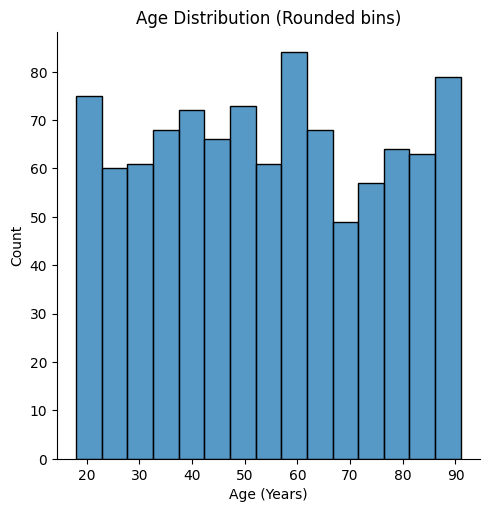

In [44]:
"""
Now plotting a univariate plot for column Age after calculating the number of bins required.
Since the number of bins required is 14.6, I am afraid it might raise a TypeError,
insisting the number of bins can only be an integer.
So I am going to use the try and except to catch the error.
"""

try:
    displot_age = sns.displot(data=df, x="Age (Years)", bins=number_bins)
    plt.title("Age Distribution")  #This is the title of my plot
    plt.xlabel("Age (Years)")   #This would help me put a label on x-axis (horizontal)
    plt.ylabel("Count")    #This would help me put a label on the y-axis (vertical)
    plt.show()            #This function would display the plot
except TypeError as e:     #This is just a method of catching error just in case the "try" code block did not work
    print("Caught TypeError:", e) 
    plt.close()  # Close the previous plot if error occurs
    displot_age = sns.displot(data=df, x="Age (Years)", bins=15) #This is the "engine" of my code which takes the dataframe, column and bins as argument rounding number of bins required to the nearest integer
    plt.title("Age Distribution (Rounded bins)")  #This is the title of my plot
    plt.xlabel("Age (Years)")  #This would help me put a label on x-axis (horizontal)
    plt.ylabel("Count")   #This would help me put a label on the y-axis (vertical)
    plt.show()   #This function would display the plot

# 2b

Remember from Task 3. there were 19 rows of the "Dependants" column with unfilled values. Since this column is a continous variable, it then makes sense to replace empty rows with the mean of the total column. The rationale for this decision is backed up by information obtained from Fundamentals of Data Science Lecture 2-Week-6-2024-2025-T2.pdf. Also, Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning. 

2


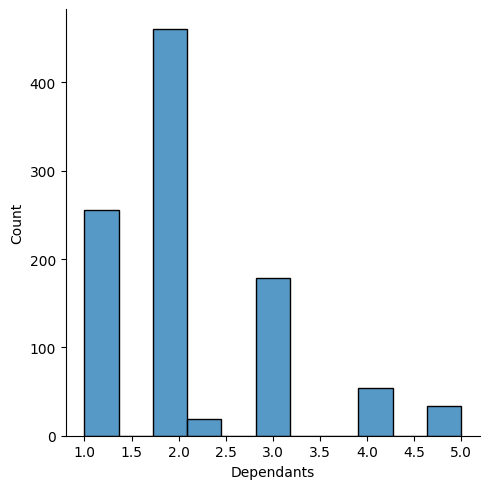

In [45]:

mean_dependant = df["Dependants"].mean()  # Calculating the mean of the 'Dependants' column to use it for filling missing values.
print(f"{mean_dependant:.0f}")  # Printing the mean value formatted to 0 decimal place since number of dependants can never be in float.

df['Dependants'] = df['Dependants'].fillna(mean_dependant)  # Here, I am filling the missing values  with the mean value.

"""This line of code is checking if there are any remaining null values in the 'Dependants' column after attempting to fill them.
 The function should return 'False' if all 19 missing values have been filled, or 'True' if there are still missing values.
"""
df['Dependants'].isnull().values.any()

displot_dependant= sns.displot(data = df, x = "Dependants")




# 2c

Age (of default bins), conditioned on Marital Status, which means in this task, i am not going to use the number of bins(number_bins) i already calculated for in task 2a

NOTE: I am going to use stripplot for this task since "Marital Status" is a categorical variable. My choice of action is backed up from information obtained from "Programming for Artificial Intelligence and Data Science, particularly in Workshop4 Ex20".

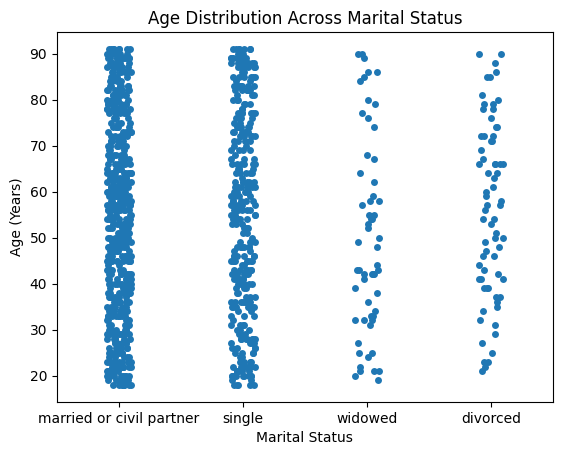

In [23]:
"""
I am using Seaborn's stripplot to visualize the distribution of age across different marital statuses.
This plot shows individual data points, which helps me see how age is spread within each marital group.
"""

marital_status_vs_age = sns.stripplot(data=df, x="Marital Status", y="Age (Years)")  
plt.title("Age Distribution Across Marital Status")  # I am adding a title to the plot 
plt.xlabel("Marital Status")  # Label for the x-axis
plt.ylabel("Age (Years)")     # Label for the y-axis
plt.show()  # This line is used to display the plot.




# 3a
Commuted distance against salary

I am using relplot method for this since thwy are both continous varuables, which automatically means scatter plot by default. My choice of plot is backed up from information obtained from "Programming for Artificial Intelligence and Data Science, particularly in Workshop4 Ex21".

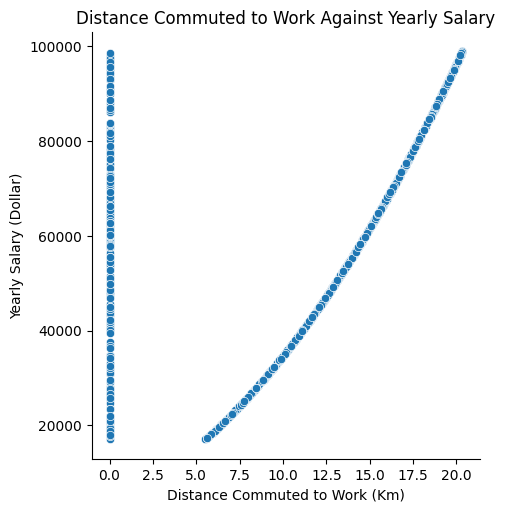

In [46]:
# Create a scatter plot using Seaborn's relplot to visualize the relationship between commuted distance and salary
commuted_dist_vs_salary = sns.relplot(data=df, x="Distance Commuted to Work (Km)", y="Yearly Salary (Dollar)")
plt.title("Distance Commuted to Work Against Yearly Salary")     # Add a title to the plot
plt.xlabel("Distance Commuted to Work (Km)")  # Label the x-axis (Distance Commuted to Work)
plt.ylabel("Yearly Salary (Dollar)")         # Label the y-axis (Yearly Salary in Dollars)
plt.show()                                  # Display the plot


# 3b

Age against Salary

I am using relplot method for this since they are both continous varuables, which automatically means scatter plot by default. I am using relplot method for this since they are both continous variables, which automatically means scatter plot by default. My choice of plot is backed up from information obtained from "Programming for Artificial Intelligence and Data Science, particularly in Workshop4 Ex21".

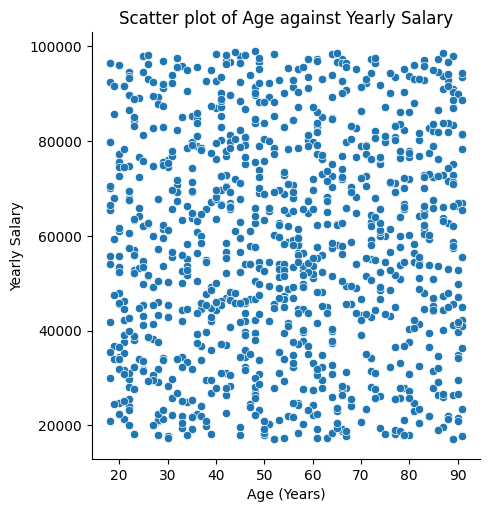

In [47]:


"""
Although this function accepts four arguments, the DataFrame itself, two variables, and the kind of plot 
note that 'scatter' is the default value for the 'kind' parameter in relplot. 
However, I included it explicitly here for clarity.
"""

age_vs_salary = sns.relplot(data=df, x="Age (Years)", y="Yearly Salary (Dollar)", kind="scatter")
plt.title("Scatter plot of Age against Yearly Salary")  #This is the title of my plot
plt.xlabel("Age (Years)")   #This would help me put a label on x-axis (horizontal)
plt.ylabel("Yearly Salary")    #This would help me put a label on the y-axis (vertical)
plt.show()      #this would display my plot


# 3c
Age against Salary conditioned by Dependants



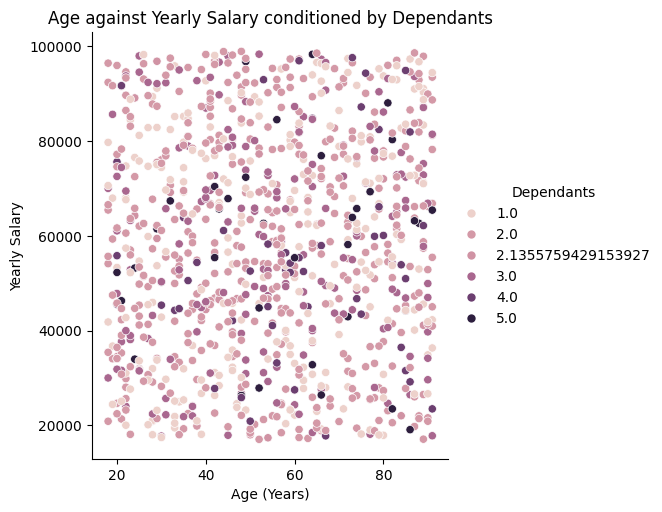

In [48]:
"""
Creating a scatter plot using Seaborn's relplot to visualize the relationship between Age and Yearly Salary
This plot is conditioned by the 'Dependants' column, which will assign different colors to the data points
based on the number of dependants.
"""

age_vs_salary_cond_dependants = sns.relplot(data = df, x = "Age (Years)", y="Yearly Salary (Dollar)", hue = "Dependants" )
plt.title("Age against Yearly Salary conditioned by Dependants")  #This is the title of my plot
plt.xlabel("Age (Years)")   #This would help me put a label on x-axis (horizontal)
plt.ylabel("Yearly Salary")    #This would help me put a label on the y-axis (vertical)
plt.show()      #this would display my plot

# 4 
Provide a Notebook cell which can do this. You should execute this cell and attach the generated plots with your submission

Here i am going to write a block of code to loop through al my plots and save them at once, i am also going to use a
"try and except" technique to catch any possible error

In [49]:
try:
    
    saving_plots = {}   # Initialize an empty dictionary to hold the plot file paths as keys and the plot objects as values

    # Assigning each plot object to a file path (without file extension for now)
    saving_plots["./age_displot_plot"] = displot_age 
    saving_plots["./dependant_displot_plot"] = displot_dependant
    saving_plots["./marital_status_vs_age_plot"] = marital_status_vs_age
    saving_plots["./commuted_dist_vs_salary_plot"] = commuted_dist_vs_salary
    saving_plots["./age_vs_salary_plot"] = age_vs_salary
    saving_plots["./age_vs_salary_cond_dependants"] = age_vs_salary_cond_dependants

    for path, plot in saving_plots.items():    # Loop through each item in the dictionary to save each plot as an image
        plot.figure.savefig(path)              # Save the figure using the path as the filename

    print("Plots have been saved")             # Confirmation message after successful saving

except Exception as e:
    # Fallback message if any error occurs during the saving process
    print("Plots could not be saved {e}")


Plots have been saved


# PROCCESS OF CODE SOLVING-TASK AND WRITING CODES

#### a. Underatanding the task
All tasks were brought to their simplest forms by decoding them with plain and everyday english words

#### b. Planning
Before writing any code, logical steps and possible solutions were outlined, then i wrote all Codes  in their raw forms (pseudoforms)

#### c. Debugging and Error Handling
After all tasks have been attemtped, A revision of tasks was then made, technniques of catching errors were then introduced

#### d. Refactoring and optimization
All exhaustive codes (dictionaries) were then re_written into a function to ensure code reusability and portability where and when necessary

#### e. Library and Depedencies management
All libraries were then introduced and imported in the first cell before writing codes

#### f. Path Management
Where path files were absolute path, they were changed to relative paths

#### g. Final Review
A final code walkthrough was done to clean up redundant lines, improve readability, and ensure best practices were follwed and also sticking to the scope of study taught in class and workshops

# MATERIALS AND REFERENCES USED 

#### During my tasks, several resources were consulted and used. Here are all resources consulted

#### Online Reources
Python Full Course for Beginners [2025] with Mosh - https://www.youtube.com/watch?v=K5KVEU3aaeQ

Python for Beginners – Full Course [Programming Tutorial] - https://www.bing.com/videos/riverview/relatedvideo?q=python+beginners&&mid=BB23138CE32C17559AEBBB23138CE32C17559AEB&FORM=VCGVRP

#### University of Hull Resources
All documentds that were used during workshops, lecturing classes for "Programming for Artificial Intelligence and Data Science" module were resourced

#### Physical book
Python Crash Course, 3rd Edition: A Hands-On, Project-Based Introduction to Programming - Eric Matthes

Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning. 
#### AI
Artificial Intelligence(Grok) was used to give a detailed explanation of some arguments. Example of Prompts used:  "How do i print my dictionary to make it appear vertically, rather than appearing horizontally(side-by_side), i want it to be readable".

